# CONNECTING ROUTES DATASET

## BUSINESS OBJECTIVE
* Maximize profit.
* Minimize churn rate.
* Maximize service quality.

## CONSTRAINTS
* High Competition.
* War and Natural Calamity. 

## DATA DICTIONARY 

| **slno** | **Name of Feature** | **Description**                                                                           | **Type** | **Relevance** |
|:--------:|:-------------------:|:------------------------------------------------------------------------------------------|:--------:|:-------------:|
| 1        | flights             | Airline 2-letter (IATA) or 3-letter (ICAO)   code of the airline.                         | Nominal  | Irrelevant    |
| 2        | ID                  | Airline   ID Unique OpenFlights identifier for airline                                    | Nominal  | Irrelevant    |
| 3        | main Airport        | Source   airport 3-letter (IATA) or 4-letter (ICAO) code of the source airport            | Nominal  | Relevant      |
| 4        | main Airport ID     | Source   airport ID Unique OpenFlights identifier for source airport                      | Nominal  | Irrelevant    |
| 5        | Destination         | Destination airport 3-letter (IATA) or 4-letter (ICAO) code of the   destination airport. | Nominal  | Relevant      |
| 6        | Destination ID      | Destination   airport ID Unique OpenFlights identifier for destination airport            | Nominal  | Irrelevant    |
| 7        | haults              | Number of stops on this flight ("0" for direct)                                           | Nominal  | Irrelevant    |
| 8        | machinary           | 3-letter   codes for plane type(s) generally used on this flight, separated by spaces     | Nominal  | Irrelevant    |

Importing the required libraries. 

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

Loading the dataset using pandas library

In [2]:
df=pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass11\connecting_routes.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [3]:
df.nunique()

0     568
1     548
2    3409
3    3321
4    3418
5    3327
6       1
7       2
8    3945
dtype: int64

Dropping the column number 6 as it just has 1 value of NaN through out the column

In [4]:
df.drop(df.iloc[:,6:7],inplace=True,axis=1)
df.head()

,0,1,2,3,4,5,7,8
0,2B,410,AER,2965,KZN,2990,0,CR2
1,2B,410,ASF,2966,KZN,2990,0,CR2
2,2B,410,ASF,2966,MRV,2962,0,CR2
3,2B,410,CEK,2968,KZN,2990,0,CR2
4,2B,410,CEK,2968,OVB,4078,0,CR2


As there were no column names in the dataset on loading inputing the column names given in the question. 

In [5]:
df.columns=['flights', "ID",'main Airport', 'main Airport ID', "Destination","Destination  ID","haults","machinary"]

Checking the column names.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67663 entries, 0 to 67662
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   flights          67663 non-null  object
 1   ID               67663 non-null  object
 2   main Airport     67663 non-null  object
 3   main Airport ID  67663 non-null  object
 4   Destination      67663 non-null  object
 5   Destination  ID  67663 non-null  object
 6   haults           67663 non-null  int64 
 7   machinary        67645 non-null  object
dtypes: int64(1), object(7)
memory usage: 4.1+ MB


Removing the last two columns of the dataset. 

In [7]:
df=df.iloc[:,0:6]
df.head()

,flights,ID,main Airport,main Airport ID,Destination,Destination ID
0,2B,410,AER,2965,KZN,2990
1,2B,410,ASF,2966,KZN,2990
2,2B,410,ASF,2966,MRV,2962
3,2B,410,CEK,2968,KZN,2990
4,2B,410,CEK,2968,OVB,4078


Creating a directed Graph object and storing it in 'g'.

In [8]:
g=nx.from_pandas_edgelist(df,source='main Airport',target='Destination',create_using=nx.DiGraph())

__GRAPH__

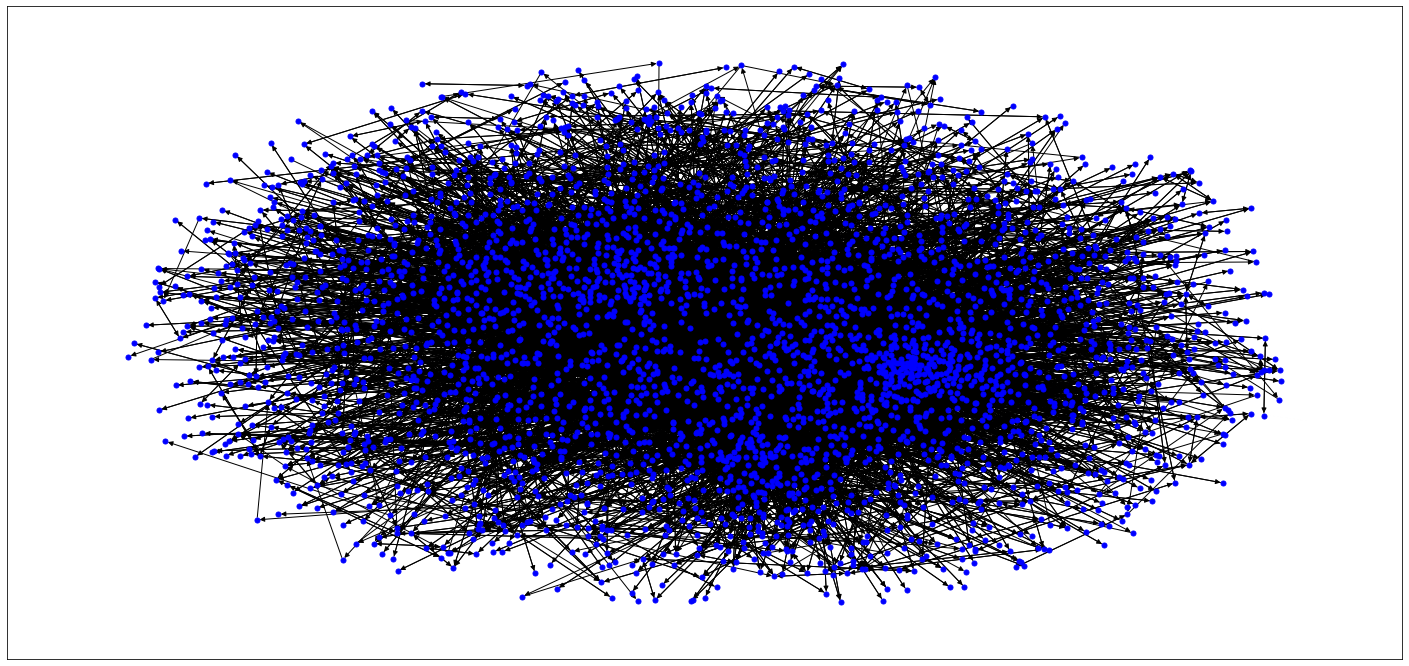

In [9]:
pos = nx.spring_layout(g, k = 0.15)
plt.figure(figsize=(25,12))
nx.draw_networkx(g, pos, node_size = 25, node_color = 'blue',with_labels=False)

__Measure of Degree Centrality__

In [10]:
def Degree_Centrality(i):
    dc=nx.degree_centrality(i)
    df = pd.DataFrame.from_dict({
        'node': list(dc.keys()),
        'centrality': list(dc.values())
    })
    return df.sort_values('centrality', ascending=False)

In [11]:
Degree_Centrality(g)

,node,centrality
502,FRA,0.139311
449,CDG,0.137266
227,AMS,0.135222
797,IST,0.133470
202,ATL,0.126460
...,...,...
1896,FMI,0.000292
2175,TUA,0.000292
2695,BVS,0.000292
87,KPR,0.000292


__Measure of Degree of Closeness Centrality__

In [12]:
def Closeness_Centrality(i):
    cc=nx.closeness_centrality(i)
    df = pd.DataFrame.from_dict({
        'node': list(cc.keys()),
        'centrality': list(cc.values())
    })
    return df.sort_values('centrality', ascending=False)

In [13]:
Closeness_Centrality(g)

,node,centrality
502,FRA,0.392389
449,CDG,0.389993
467,LHR,0.388306
167,DXB,0.384084
227,AMS,0.382932
...,...,...
3026,STZ,0.000000
3028,SXX,0.000000
1897,LJA,0.000000
3105,VDA,0.000000


__Measure of Degree of In-Between Centrality__<br>
Betweenness centrality is a measure of centrality in a graph based on shortest paths.

In [14]:
def Betweenness_Centrality(i):
    bc=nx.betweenness_centrality(i)
    df = pd.DataFrame.from_dict({
        'node': list(bc.keys()),
        'centrality': list(bc.values())
    })
    return df.sort_values('centrality', ascending=False)

In [15]:
Betweenness_Centrality(g)

,node,centrality
717,ANC,0.070204
345,LAX,0.066164
449,CDG,0.061703
167,DXB,0.059350
502,FRA,0.051000
...,...,...
2064,CAB,0.000000
559,KMS,0.000000
2062,CSK,0.000000
2061,VEL,0.000000


## CONCLUSION

From the analysis both Frankfurt and Paris airport seems to be the most well connected airports with both the airports having high centrality values. 